In [6]:
import pandas as pd

# Buat data penjualan toko
data = {
    "Tanggal": ["2025-05-20", "2025-05-22", "2025-05-23", "2025-05-24", "2025-05-25",
                "2025-05-26", "2025-05-27", "2025-05-28", "2025-05-29", "2025-05-30"],
    "Produk": ["teh pucuk", "pocari sweat", "cocacola", "tebs", "Teh Kotak",
               "Kopicap", "Susu murni", "Lasegar", "larutan", "vitacimin"],
    "Terjual": [10, 5, 11, 10, 10, 10, 5, 20, 11, 13],  # Hanya angka
    "Stok": [30, 35, 20, 15, 32, 30, 25, 10, 20, 25],  # Hanya angka
    "Harga Satuan": [30000, 70000, 50000, 70000, 50000, 25000, 80000, 50000, 70000, 80000]
}

# Simpan dalam DataFrame
df = pd.DataFrame(data)

# Simpan sebagai file CSV
df.to_csv("data_penjualan_latihan.csv", index=False)

print("File CSV berhasil dibuat.")

File CSV berhasil dibuat.


In [7]:
#membaca file CSV
df =pd.read_csv("data_penjualan_latihan.csv")

#menampilkan 5 data pertama
print(df.head())

      Tanggal        Produk  Terjual  Stok  Harga Satuan
0  2025-05-20     teh pucuk       10    30         30000
1  2025-05-22  pocari sweat        5    35         70000
2  2025-05-23      cocacola       11    20         50000
3  2025-05-24          tebs       10    15         70000
4  2025-05-25     Teh Kotak       10    32         50000


In [8]:
#cek apa ada data yang kosong
print(df.isnull().sum())

#konvers kolom tanggal ke format datetime
df["Tanggal"]=pd.to_datetime(df["Tanggal"])
df["Total Penjualan"]=df["Terjual"] *df["Harga Satuan"]
df["Keuntungan"]=df["Total Penjualan"] - (df["Terjual"]*10000)

print(df.head())

Tanggal         0
Produk          0
Terjual         0
Stok            0
Harga Satuan    0
dtype: int64
     Tanggal        Produk  Terjual  Stok  Harga Satuan  Total Penjualan  \
0 2025-05-20     teh pucuk       10    30         30000           300000   
1 2025-05-22  pocari sweat        5    35         70000           350000   
2 2025-05-23      cocacola       11    20         50000           550000   
3 2025-05-24          tebs       10    15         70000           700000   
4 2025-05-25     Teh Kotak       10    32         50000           500000   

   Keuntungan  
0      200000  
1      300000  
2      440000  
3      600000  
4      400000  


In [9]:
!pip install scikit-learn

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Pilih fitur (x) dan target (y)
x = df[["Terjual", "Stok"]]
y = (df["Stok"] < 5).astype(int) # 1 jika stok kurang dari 5, 0 jika cukup

# Split data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Buat model Decision Tree
model =DecisionTreeClassifier()
model.fit(x_train, y_train)

# Evaluasi model
y_pred =model.predict(x_test)
print("Akurasi Model: ", accuracy_score(y_test, y_pred))

Akurasi Model:  1.0


In [11]:
produk_baru=[[8,3]]
prediksi=model.predict(produk_baru)

if prediksi[0]==1:
  print("produk perlu di restock")
else:
  print("stock cukup")

stock cukup


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


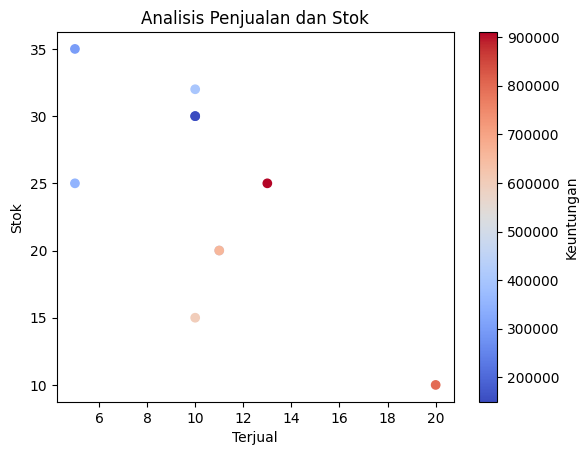

In [14]:
import matplotlib.pyplot as plt
plt.scatter (df["Terjual"], df["Stok"], c=df["Keuntungan"], cmap="coolwarm")
plt.xlabel("Terjual")
plt.ylabel("Stok")
plt.title("Analisis Penjualan dan Stok")
plt.colorbar (label="Keuntungan")
plt.show()